#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [4]:
boston_df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# Task 2: Generate Descriptive Statistics and Visualizations

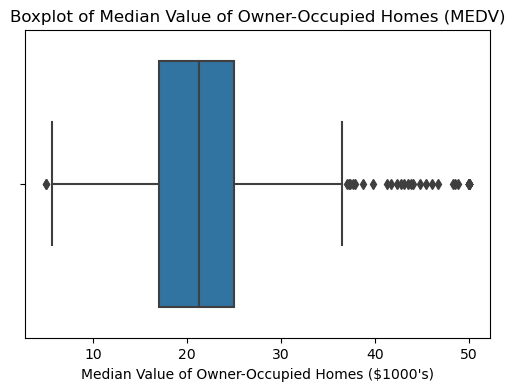

In [7]:
# 1. Boxplot for "Median value of owner-occupied homes" (MEDV)
plt.figure(figsize=(6, 4))
sns.boxplot(data=boston_df, x='MEDV')
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value of Owner-Occupied Homes ($1000\'s)')
plt.show()

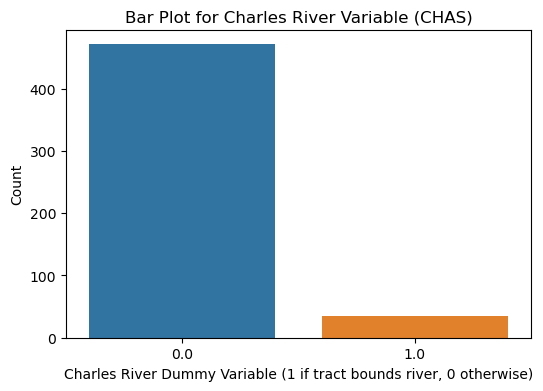

In [8]:
# 2. Bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(6, 4))
sns.countplot(data=boston_df, x='CHAS')
plt.title('Bar Plot for Charles River Variable (CHAS)')
plt.xlabel('Charles River Dummy Variable (1 if tract bounds river, 0 otherwise)')
plt.ylabel('Count')
plt.show()

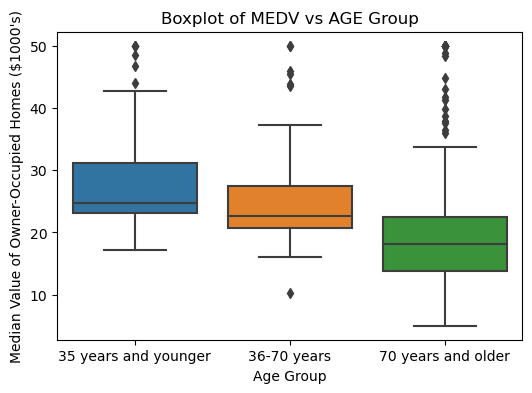

In [9]:
# 3. Boxplot for MEDV vs AGE variable (discretized)
# Discretize AGE into three groups: <=35, 36-70, >70
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 years and younger', '36-70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(6, 4))
sns.boxplot(data=boston_df, x='AGE_group', y='MEDV')
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000\'s)')
plt.show()

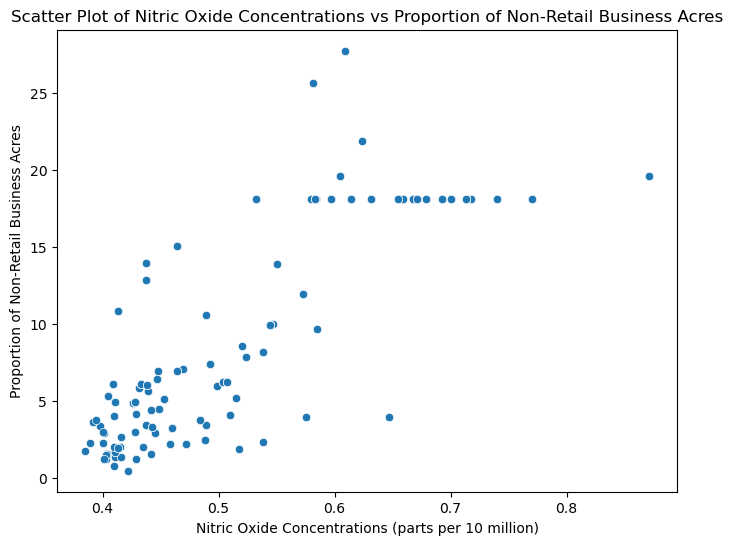

In [10]:
# 4. Scatter plot for the relationship between NOX and INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

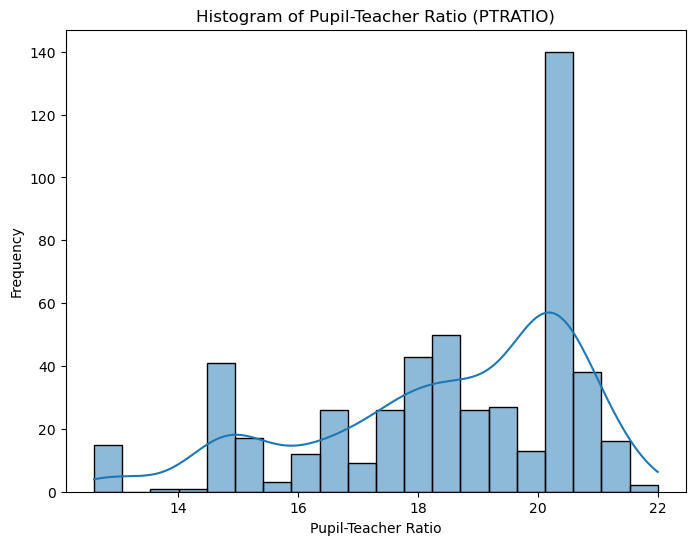

In [11]:
# 5. Histogram for the pupil-teacher ratio (PTRATIO)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], kde=True, bins=20)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided.

**1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

 __Hypothesis__:

 * __Null Hypothesis (H₀):__ There is no significant difference in the median value of houses between those bounded by the Charles River (CHAS = 1) and those not bounded by the Charles River (CHAS = 0).

 * __Alternative Hypothesis (H₁):__ There is a significant difference in the median value of houses between those bounded by the Charles River and those not bounded by the Charles River.

__Test:__ We will perform an independent samples T-test (unpaired) to compare the median value of houses (MEDV) for two independent groups: houses bounded by the Charles River (CHAS = 1) and those not bounded (CHAS = 0).

In [12]:
from scipy.stats import ttest_ind

# Group the data by CHAS variable
group_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test
t_stat, p_value = ttest_ind(group_1, group_2)

# Hypothesis testing
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in the median value of houses between those bounded by the Charles River and those not."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in the median value of houses between those bounded by the Charles River and those not."

t_stat, p_value, conclusion


(3.996437466090509,
 7.390623170519905e-05,
 'Reject the null hypothesis: There is a significant difference in the median value of houses between those bounded by the Charles River and those not.')

**2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

 __Hypothesis__:

 * __Null Hypothesis (H₀):__ There is no significant difference in the median value of houses (MEDV) for each category of the proportion of owner-occupied units built prior to 1940 (AGE)

 * __Alternative Hypothesis (H₁):__  There is a significant difference in the median value of houses for each category of the proportion of owner-occupied units built prior to 1940.

__Test:__ To analyze this, we will first discretize the AGE variable into categories, and then use ANOVA to compare the means of MEDV across these categories.

In [13]:
group_1 = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']


In [14]:
from scipy.stats import f_oneway

# Discretize AGE into three groups: <=35, 36-70, >70
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 years and younger', '36-70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Perform ANOVA
group_1 = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
group_2 = boston_df[boston_df['AGE_group'] == '36-70 years']['MEDV']
group_3 = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

f_stat, p_value = f_oneway(group_1, group_2, group_3)

# Hypothesis testing
if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in the median value of houses (MEDV) across different AGE groups."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in the median value of houses (MEDV) across different AGE groups."

f_stat, p_value, conclusion


(36.40764999196599,
 1.7105011022702984e-15,
 'Reject the null hypothesis: There is a significant difference in the median value of houses (MEDV) across different AGE groups.')

**3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

 __Hypothesis__:

 * __Null Hypothesis (H₀):__ There is no significant linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

 * __Alternative Hypothesis (H₁):__   There is a significant linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

__Test:__ We will perform a Pearson correlation test to measure the strength and direction of the linear relationship between NOX and INDUS.

In [15]:
from scipy.stats import pearsonr

# Perform Pearson correlation
corr_stat, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Hypothesis testing
if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant linear relationship between Nitric oxide concentrations and proportion of non-retail business acres."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant linear relationship between Nitric oxide concentrations and proportion of non-retail business acres."

corr_stat, p_value, conclusion


(0.7636514469209149,
 7.913361061240043e-98,
 'Reject the null hypothesis: There is a significant linear relationship between Nitric oxide concentrations and proportion of non-retail business acres.')

**4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

 __Hypothesis__:

 * __Null Hypothesis (H₀):__ There is no significant impact of the weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV)..

 * __Alternative Hypothesis (H₁):__    There is a significant impact of the weighted distance to the five Boston employment centers on the median value of owner-occupied homes..

__Test:__ We will perform a linear regression analysis to assess the impact of the weighted distance (DIS) on the median value of homes (MEDV).

In [16]:
import statsmodels.api as sm

# Prepare the data for regression
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable (X) for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression results
regression_summary = model.summary()

# Extract p-value for the coefficient of DIS
p_value = model.pvalues['DIS']

# Hypothesis testing
if p_value < alpha:
    conclusion = "Reject the null hypothesis: The weighted distance to the five Boston employment centres has a significant impact on the median value of owner-occupied homes."
else:
    conclusion = "Fail to reject the null hypothesis: The weighted distance to the five Boston employment centres does not have a significant impact on the median value of owner-occupied homes."

regression_summary, p_value, conclusion


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   MEDV   R-squared:                       0.062
 Model:                            OLS   Adj. R-squared:                  0.061
 Method:                 Least Squares   F-statistic:                     33.58
 Date:                Fri, 03 Jan 2025   Prob (F-statistic):           1.21e-08
 Time:                        16:51:51   Log-Likelihood:                -1823.9
 No. Observations:                 506   AIC:                             3652.
 Df Residuals:                     504   BIC:                             3660.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------